In [54]:
import pandas as pd
import plotly.express as px

# Loading Data

In [3]:
data = '/directory/dc_marvel_movie_performance.csv'

df = pd.read_csv(data)

# Exploring

In [5]:
df

,Film,U.S. release date,Box office gross Domestic (U.S. and Canada ),Box office gross Other territories,Box office gross Worldwide,Budget,MCU,Phase,Distributor,MPAA Rating,...,Character Family,Domestic %,Gross to Budget,Rotten Tomatoes Critic Score,Male/Female-led,Year,Inflation Adjusted Worldwide Gross,Inflation Adjusted Budget,2.5x prod,Break Even
0,Superman,15/12/1978,"$134,478,449","$166,000,000","$300,478,449","$55,000,000",False,NaN,Warner Bros.,PG,...,Superman,45%,5.46,94.0,Male,1978.0,"$1,404,237,104","$257,033,544","$137,500,000",Success
1,Superman II,19/06/1981,"$108,185,706","$108,200,000","$216,385,706","$54,000,000",False,NaN,Warner Bros.,PG,...,Superman,50%,4.01,83.0,Male,1981.0,"$725,336,273","$181,010,842","$135,000,000",Success
2,Superman III,17/06/1983,"$59,950,623","$20,300,000","$80,250,623","$39,000,000",False,NaN,Warner Bros.,PG,...,Superman,75%,2.06,29.0,Male,1983.0,"$245,506,947","$119,310,861","$97,500,000",Flop
3,Supergirl,21/11/1984,"$14,296,438",NaN,"$14,296,438","$35,000,000",False,NaN,Tri-Star Pictures,PG,...,Superman,100%,0.41,8.0,Female,1984.0,"$41,926,345","$102,642,497","$87,500,000",Flop
4,Howard the Duck,01/08/1986,"$16,295,774","$21,667,000","$37,962,774","$37,000,000",False,NaN,Universal Pictures,PG,...,Howard the Duck,43%,1.03,13.0,Male,1986.0,"$37,962,774","$37,000,000","$92,500,000",Flop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,Blue Beetle,18/08/2023,"$72,488,072","$56,800,000","$129,288,072","$120,000,000",False,NaN,Warner Bros.,PG-13,...,Blue Beetle,56%,1.08,78.0,Male,2023.0,"$129,288,072","$120,000,000","$300,000,000",Flop
110,The Marvels,10/11/2023,"$84,500,223","$121,373,601","$205,873,824","$219,800,000",True,5.0,Walt Disney Studios Motion Pictures,PG-13,...,Captain Marvel,41%,0.94,62.0,Female,2023.0,"$205,873,824","$219,800,000","$549,500,000",Flop
111,Aquaman and the Lost Kingdom,20/12/2023,"$124,436,589","$309,900,000","$434,336,589","$205,000,000",False,NaN,Warner Bros.,PG-13,...,Aquaman,29%,2.12,35.0,Male,2023.0,"$434,336,589","$205,000,000","$512,500,000",Flop
112,Madame Web,14/02/2024,"$42,619,699","$54,000,000","$96,619,699","$80,000,000",False,NaN,Columbia Pictures,PG-13,...,Spider-Man Allies and Villains,44%,1.21,13.0,Female,2024.0,"$96,619,699","$80,000,000","$200,000,000",Flop


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Film                                          113 non-null    object 
 1   U.S. release date                             113 non-null    object 
 2   Box office gross Domestic (U.S. and Canada )  113 non-null    object 
 3   Box office gross Other territories            112 non-null    object 
 4   Box office gross Worldwide                    113 non-null    object 
 5   Budget                                        113 non-null    object 
 6   MCU                                           113 non-null    object 
 7   Phase                                         33 non-null     float64
 8   Distributor                                   113 non-null    object 
 9   MPAA Rating                                   113 non-null    obj

In [7]:
# Deleting empty row
df.drop(index=113, inplace=True)

In [8]:
# Checking duplicates
df.duplicated().sum()

0

In [9]:
# Checking null values
df.isnull().sum()

Film                                             0
U.S. release date                                0
Box office gross Domestic (U.S. and Canada )     0
Box office gross Other territories               1
Box office gross Worldwide                       0
Budget                                           0
MCU                                              0
Phase                                           80
Distributor                                      0
MPAA Rating                                      0
Length                                           0
Minutes                                          0
Franchise                                        0
Character Family                                 0
Domestic %                                       0
Gross to Budget                                  0
Rotten Tomatoes Critic Score                     0
Male/Female-led                                  0
Year                                             0
Inflation Adjusted Worldwide Gr

In [10]:
# Convert to datetime
df['U.S. release date'] = pd.to_datetime(df['U.S. release date'], format='%d/%m/%Y')

In [451]:
# list of columns with signs
cols = ['Box office gross Domestic (U.S. and Canada )', 'Box office gross Other territories',
        'Box office gross Worldwide', 'Budget', 'Domestic %', 'Inflation Adjusted Worldwide Gross', 'Inflation Adjusted Budget',
        '2.5x prod']

# Cleans dollar and comma signs
df[cols] = df[cols].replace({'\$': '', ',': '', '%': ''}, regex=True)

In [453]:
# Overwrites typing
df['Box office gross Domestic (U.S. and Canada )'] = \
    (pd.to_numeric(df['Box office gross Domestic (U.S. and Canada )'], errors='ignore'))

df['Box office gross Other territories'] = \
    (pd.to_numeric(df['Box office gross Other territories'], errors='ignore'))

df['Box office gross Worldwide'] = (pd.to_numeric(df['Box office gross Worldwide'], errors='ignore'))

df['Budget'] = pd.to_numeric(df['Budget'], errors='ignore')

df['Domestic %'] = pd.to_numeric(df["Domestic %"], errors='ignore')

df['Gross to Budget'] = pd.to_numeric(df['Gross to Budget'], errors='ignore')

df['Rotten Tomatoes Critic Score'] = pd.to_numeric(df['Rotten Tomatoes Critic Score'], errors='ignore')

df['Inflation Adjusted Worldwide Gross'] = \
    (pd.to_numeric(df['Inflation Adjusted Worldwide Gross'], errors='ignore'))

df['Inflation Adjusted Budget'] = (pd.to_numeric(df['Inflation Adjusted Budget'], errors='ignore'))

df['2.5x prod'] = pd.to_numeric(df['2.5x prod'], errors='ignore')

In [455]:
# Slices by franchise
df_dc = df.query('Franchise == "DC"')
df_marvel = df.query('Franchise == "Marvel"')

# Reindexing
df_dc.reset_index(drop=True, inplace=True)
df_marvel.reset_index(drop=True, inplace=True)

# Removing columns
dc_remove_columns = ['Phase', 'MCU', 'Franchise', 'Gross to Budget','Minutes', 'Domestic %',
                     'Inflation Adjusted Worldwide Gross', 'Inflation Adjusted Budget']
df_dc = df_dc.drop(columns= dc_remove_columns).copy()

marvel_remove_columns = ['Franchise', 'Gross to Budget','Minutes', 'Domestic %',
                     'Inflation Adjusted Worldwide Gross', 'Inflation Adjusted Budget', 'Break Even']
df_marvel = df_marvel.drop(columns= marvel_remove_columns).copy()

# Fill value null and Adjusting
index_null = df_dc[df_dc['Box office gross Other territories'].isnull()].index
i = index_null[0]

df_dc.at[i, 'Box office gross Other territories'] = (df_dc.loc[i - 1, 'Box office gross Other territories']
                                                    + df_dc.loc[i + 1, 'Box office gross Other territories']) / 2

df_dc.at[i, 'Box office gross Worldwide'] = (df_dc.loc[i, 'Box office gross Domestic (U.S. and Canada )']
                                                    + df_dc.loc[i, 'Box office gross Other territories'])

# Vizualization

## DC

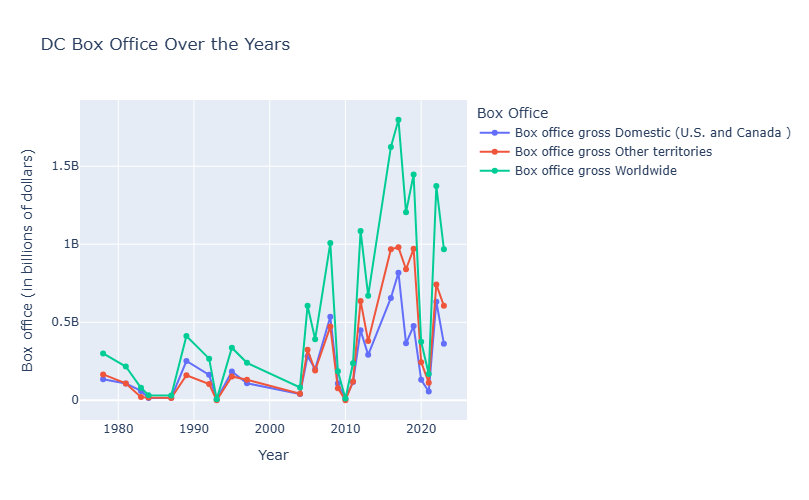

In [391]:
box_office_year_dc = df_dc.groupby('Year').agg({'Box office gross Domestic (U.S. and Canada )': 'sum',
                                             'Box office gross Other territories': 'sum',
                                             'Box office gross Worldwide': 'sum'})


fig = px.line(box_office_year_dc, x=box_office_year_dc.index, y=box_office_year_dc.columns,
              labels={'variable': 'Box Office'},
            title='DC Box Office Over the Years', markers=True)

fig.update_layout(width=1000, height=500,
    xaxis_title='Year',
    yaxis_title='Box office (in billions of dollars)')

fig.show()

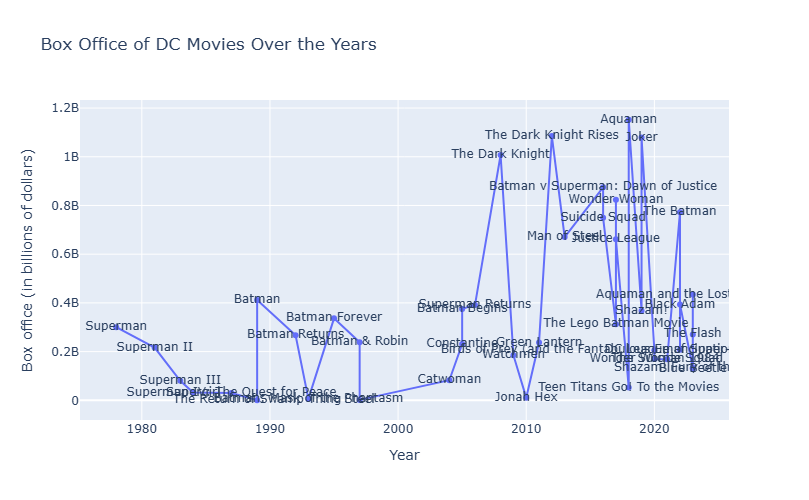

In [251]:
fig = px.line(df_dc, x='Year', y='Box office gross Worldwide',
            title='Box Office of DC Movies Over the Years', markers=False,
              text='Film',
             labels=None)

fig.update_layout(width=1000, height=500,
    xaxis_title='Year',
    yaxis_title='Box office (in billions of dollars)')

fig.show()

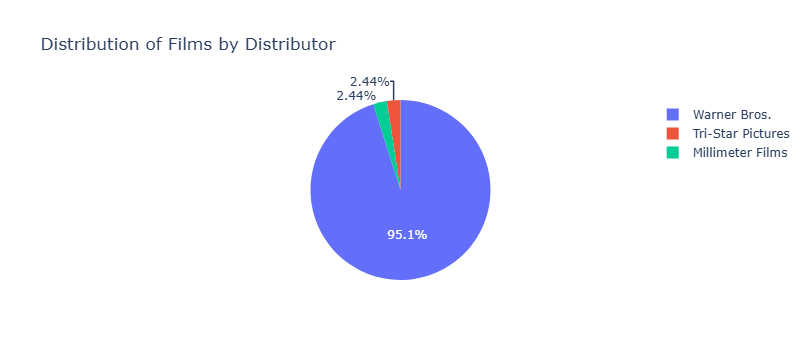

In [310]:
distributor_count = df_dc['Distributor'].value_counts().reset_index()
distributor_count.columns = ['Distributor', 'Count']

fig = px.pie(distributor_count, names='Distributor', values='Count', 
                 title='Distribution of Films by Distributor')
fig.show()

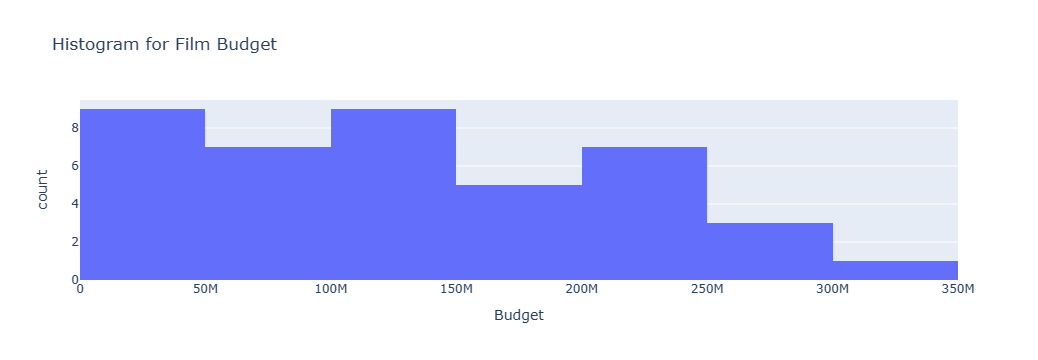

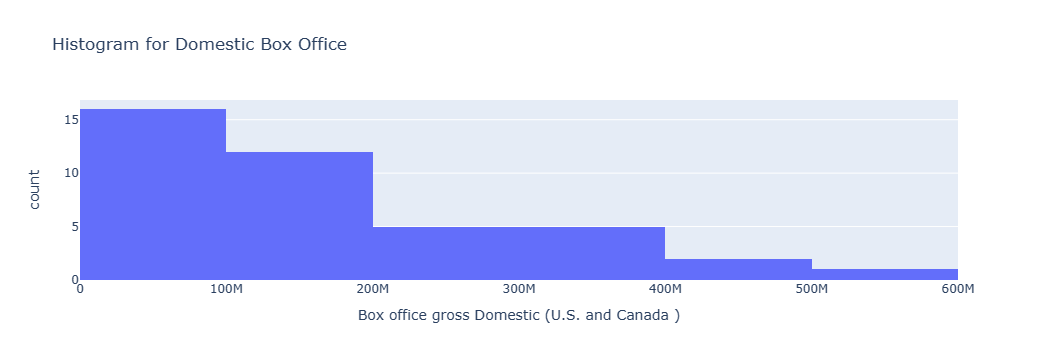

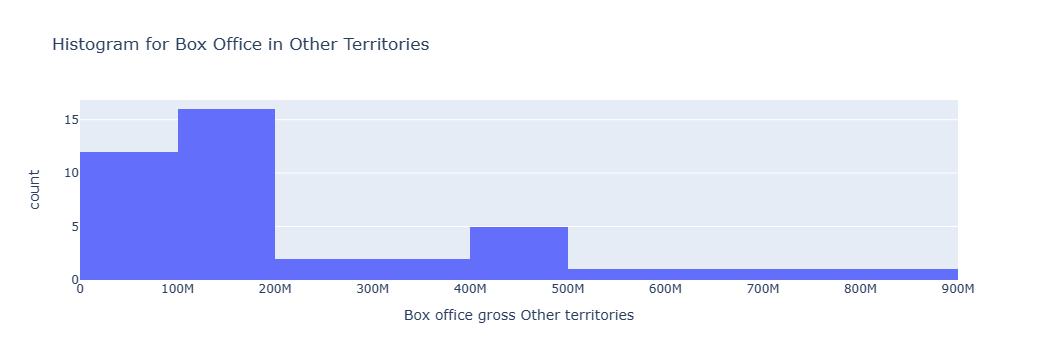

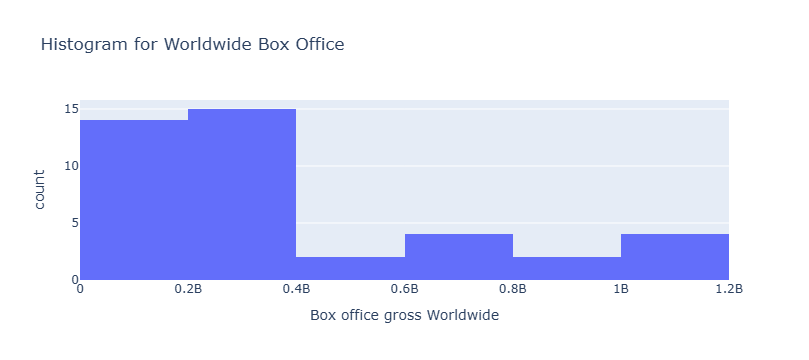

In [405]:
fig_budget = px.histogram(df_dc, x='Budget', title='Histogram for Film Budget')


fig_domestic = px.histogram(df_dc, x='Box office gross Domestic (U.S. and Canada )', title='Histogram for Domestic Box Office')


fig_other_territories = px.histogram(df_dc, x='Box office gross Other territories', title='Histogram for Box Office in Other Territories')


fig_worldwide = px.histogram(df_dc, x='Box office gross Worldwide', title='Histogram for Worldwide Box Office')


fig_budget.show()
fig_domestic.show()
fig_other_territories.show()
fig_worldwide.show()

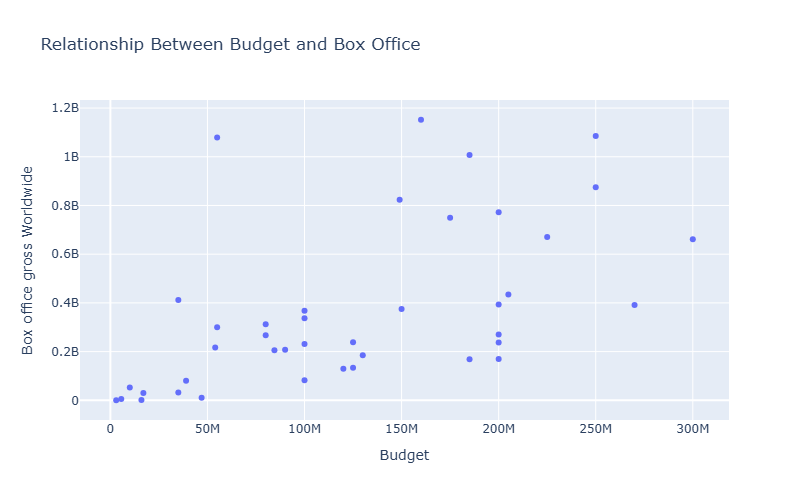

In [367]:
fig = px.scatter(df_dc, x='Budget', y='Box office gross Worldwide',
                title='Relationship Between Budget and Box Office')

fig.update_layout(width=1000, height=500,
    xaxis_title='Budget',
    yaxis_title='Box office gross Worldwide')

fig.show()

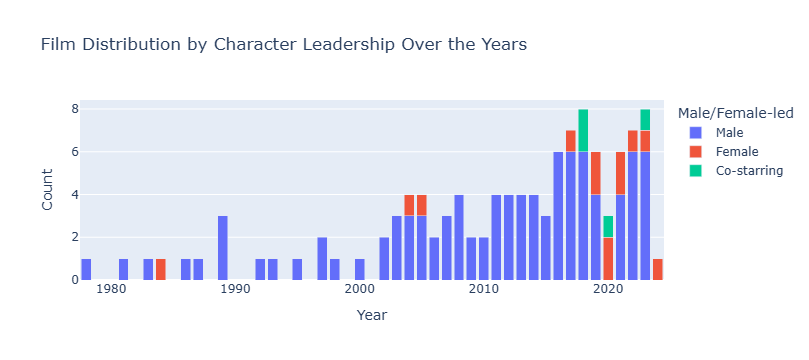

In [389]:
gender_distribution = df.groupby(['Year', 'Male/Female-led']).size().reset_index(name='Count')

fig = px.bar(gender_distribution, x='Year', y='Count', color='Male/Female-led', barmode='stack',
             title='Film Distribution by Character Leadership Over the Years')

fig.show()

## Marvel

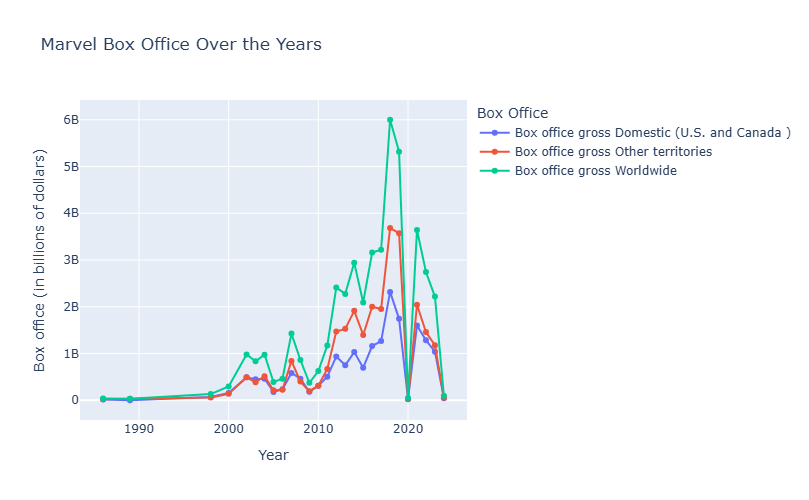

In [457]:
box_office_year_marvel = df_marvel.groupby('Year').agg({'Box office gross Domestic (U.S. and Canada )': 'sum',
                                             'Box office gross Other territories': 'sum',
                                             'Box office gross Worldwide': 'sum'})


fig = px.line(box_office_year_marvel, x=box_office_year_marvel.index, y=box_office_year_marvel.columns,
              labels={'variable': 'Box Office'},
            title='Marvel Box Office Over the Years', markers=True)

fig.update_layout(width=1000, height=500,
    xaxis_title='Year',
    yaxis_title='Box office (in billions of dollars)')

fig.show()

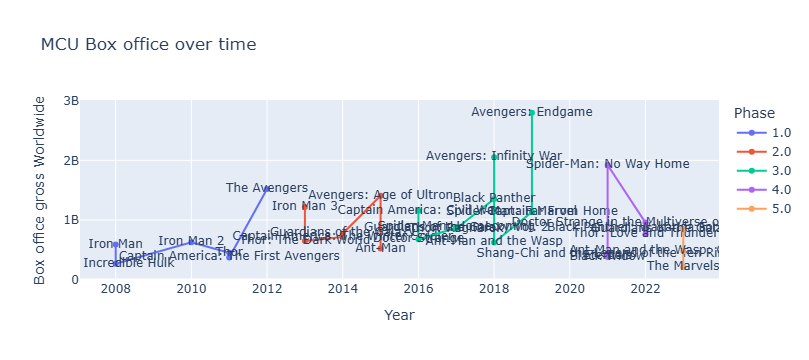

In [467]:
mcu = df_marvel.query('MCU == True')


fig = px.line(mcu, title='MCU Box office over time', x='Year',
                         y='Box office gross Worldwide', color='Phase', text='Film')
fig.show()

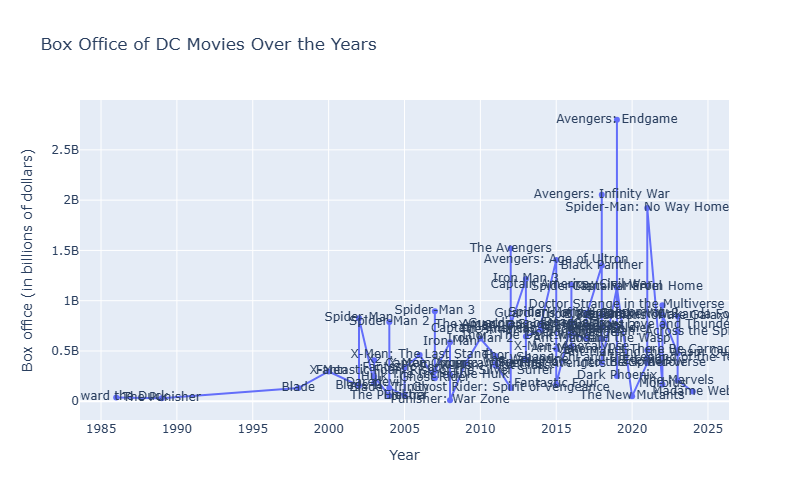

In [395]:
fig = px.line(df_marvel, x='Year', y='Box office gross Worldwide',
            title='Box Office of DC Movies Over the Years', markers=True,
              text='Film',
             labels=None)

fig.update_layout(width=1000, height=500,
    xaxis_title='Year',
    yaxis_title='Box office (in billions of dollars)')

fig.show()

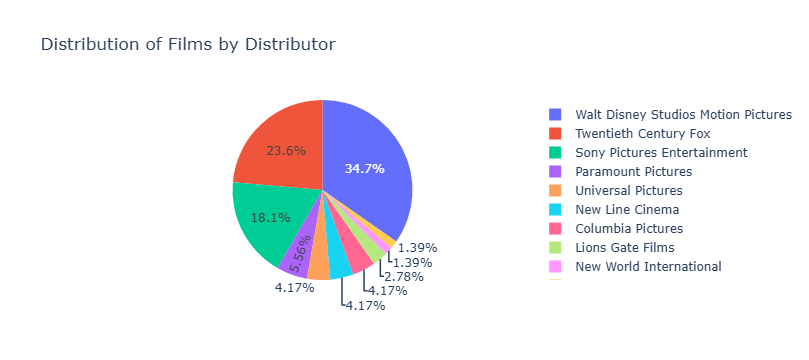

In [397]:
distributor_count = df_marvel['Distributor'].value_counts().reset_index()
distributor_count.columns = ['Distributor', 'Count']

fig = px.pie(distributor_count, names='Distributor', values='Count', 
                 title='Distribution of Films by Distributor')
fig.show()

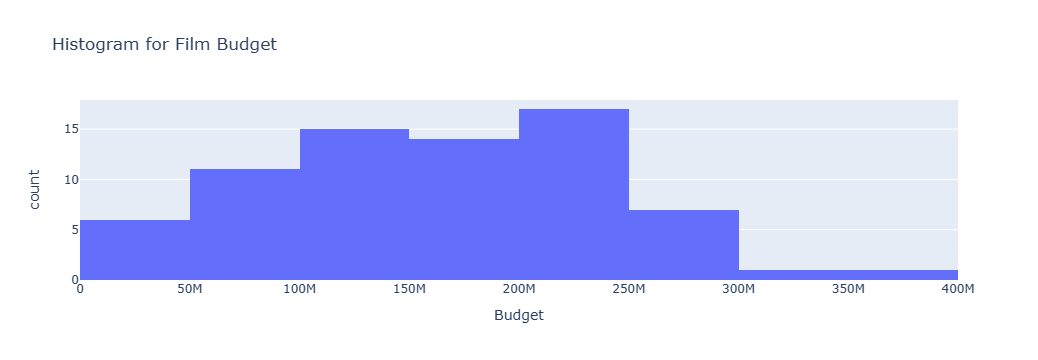

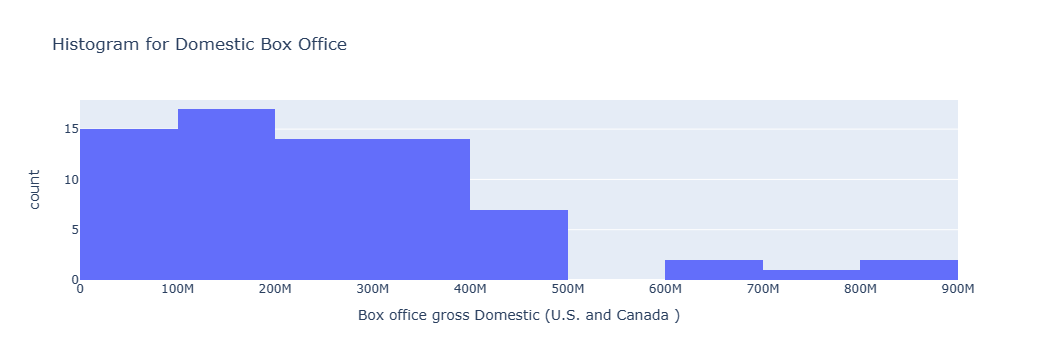

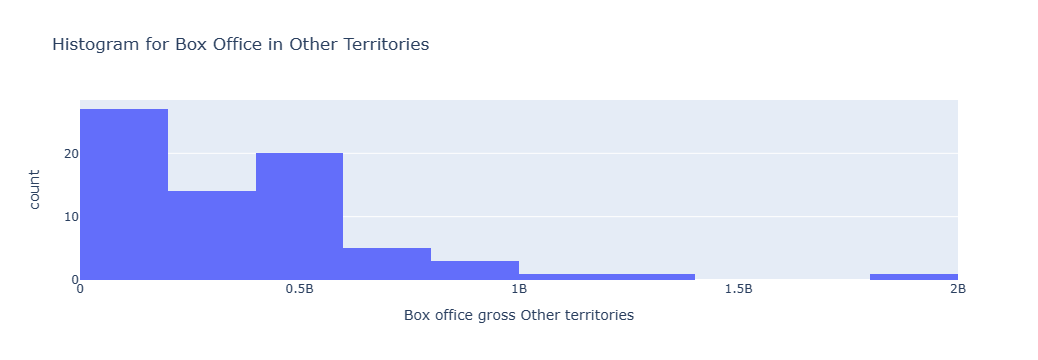

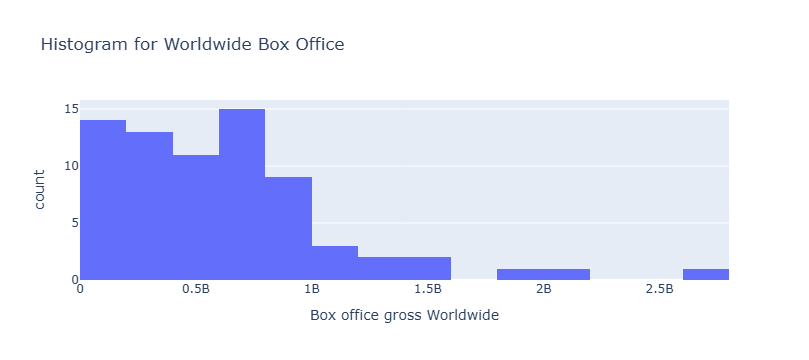

In [403]:
fig_budget = px.histogram(df_marvel, x='Budget', title='Histogram for Film Budget')


fig_domestic = px.histogram(df_marvel, x='Box office gross Domestic (U.S. and Canada )', title='Histogram for Domestic Box Office')


fig_other_territories = px.histogram(df_marvel, x='Box office gross Other territories', title='Histogram for Box Office in Other Territories')


fig_worldwide = px.histogram(df_marvel, x='Box office gross Worldwide', title='Histogram for Worldwide Box Office')


fig_budget.show()
fig_domestic.show()
fig_other_territories.show()
fig_worldwide.show()

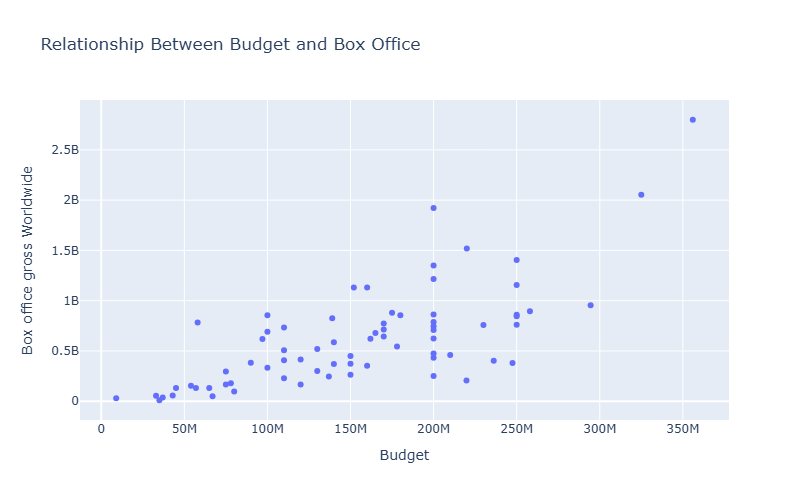

In [407]:
fig = px.scatter(df_marvel, x='Budget', y='Box office gross Worldwide',
                title='Relationship Between Budget and Box Office')

fig.update_layout(width=1000, height=500,
    xaxis_title='Budget',
    yaxis_title='Box office gross Worldwide')

fig.show()

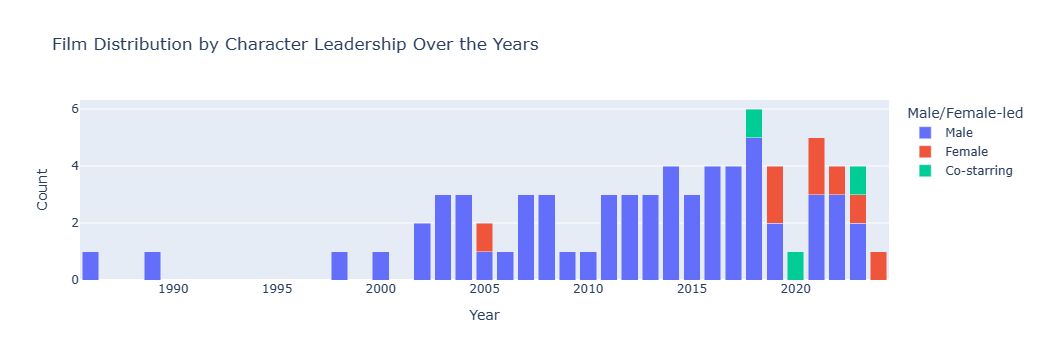

In [409]:
gender_distribution = df_marvel.groupby(['Year', 'Male/Female-led']).size().reset_index(name='Count')

fig = px.bar(gender_distribution, x='Year', y='Count', color='Male/Female-led', barmode='stack',
             title='Film Distribution by Character Leadership Over the Years')

fig.show()

## DC Vs. Marvel

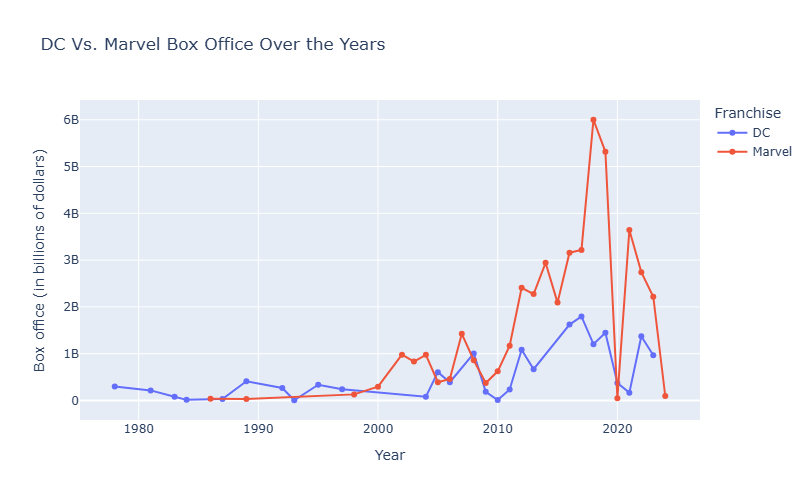

In [429]:
test = df.groupby(['Franchise', 'Year']).agg({'Box office gross Worldwide': 'sum'}).copy()

test.reset_index(inplace=True)

fig = px.line(test,
              x= 'Year' ,
              y= 'Box office gross Worldwide',
              color='Franchise',
              labels={'variable': 'Box Office'},
            title='DC Vs. Marvel Box Office Over the Years', markers=True)

fig.update_layout(width=1000, height=500,
    xaxis_title='Year',
    yaxis_title='Box office (in billions of dollars)')

fig.show()

In [5]:
!pip freeze > requirements.txt